In [1]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
#função para converter bgr para rgb
def BGRtoRGB(image):
    shape = image.shape
    l, c, p = shape
    dtype = np.uint8
    img_rgb = np.zeros(shape, dtype)
    #para cada pixel na imagem
    for i in range(l):
        for j in range(c):
          #obtem seus valores de B, G e R
            b = image[i, j, 0] 
            g = image[i, j, 1] 
            r = image[i, j, 2] 
          #e os salva como uma nova imagem RGB
            img_rgb[i, j, 0] = r
            img_rgb[i, j, 1] = g
            img_rgb[i, j, 2] = b
            
    return img_rgb

In [10]:
#importando a imagem
img_original = cv2.imread('horse.jpg')
#convertendo de bgr para rgb
img = BGRtoRGB(img_original)

In [11]:
#convertendo a imagem em uma matriz Kx3 sendo K=MxN transformando as linhas em vetores 3D
img_vector = img.reshape((-1,3))
#convertendo valores unit8 para float
img_vector = np.float32(img_vector)

In [13]:
#realizando o agrupamento de cores
criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#quantidade de agrupamentos(cores na imagem segmentada)
K = 10
#quantidade de tentativas para encontrar a menor variação entre os clusters
tent = 10
#realiza o k-means clustering para os valores obtidos/informados 
ret,label,center = cv2.kmeans(img_vector,K,None,criterio,tent,cv2.KMEANS_PP_CENTERS)

In [14]:
#convertendo valores float para uint8 e regenerando a imagem
center = np.uint8(center)
res = center[label.flatten()]
img_final = res.reshape((img.shape))

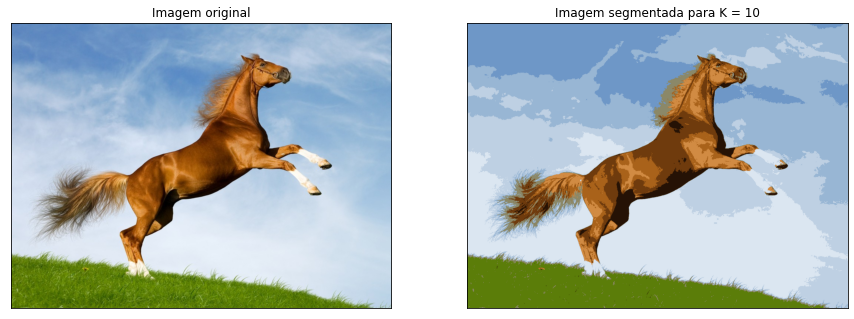

In [18]:
#plotando as imagens
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_final)
plt.title('Imagem segmentada para K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()